## Optymalizacja kosztów podróży z wykorzystaniem algorytmu symulowanego wyżarzania.
## na przykładzie - Volkswagen Transporter t4






### Dominik Tomalczyk 
### Dawid Woźniak

### Niezbędne importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
import src.data_structures as ds
import src.utils as utils
from src.sa_algorithm import init_solution, simulated_annealing, new_solution
from src.visualization import plot_random_stations, plot_score

Parametry niezbędne do obliczeń zaczerpnięte ze specyfikacji samochodu:
- Pojemność baku - 80l
- średnie spalanie /100km - 7.3l

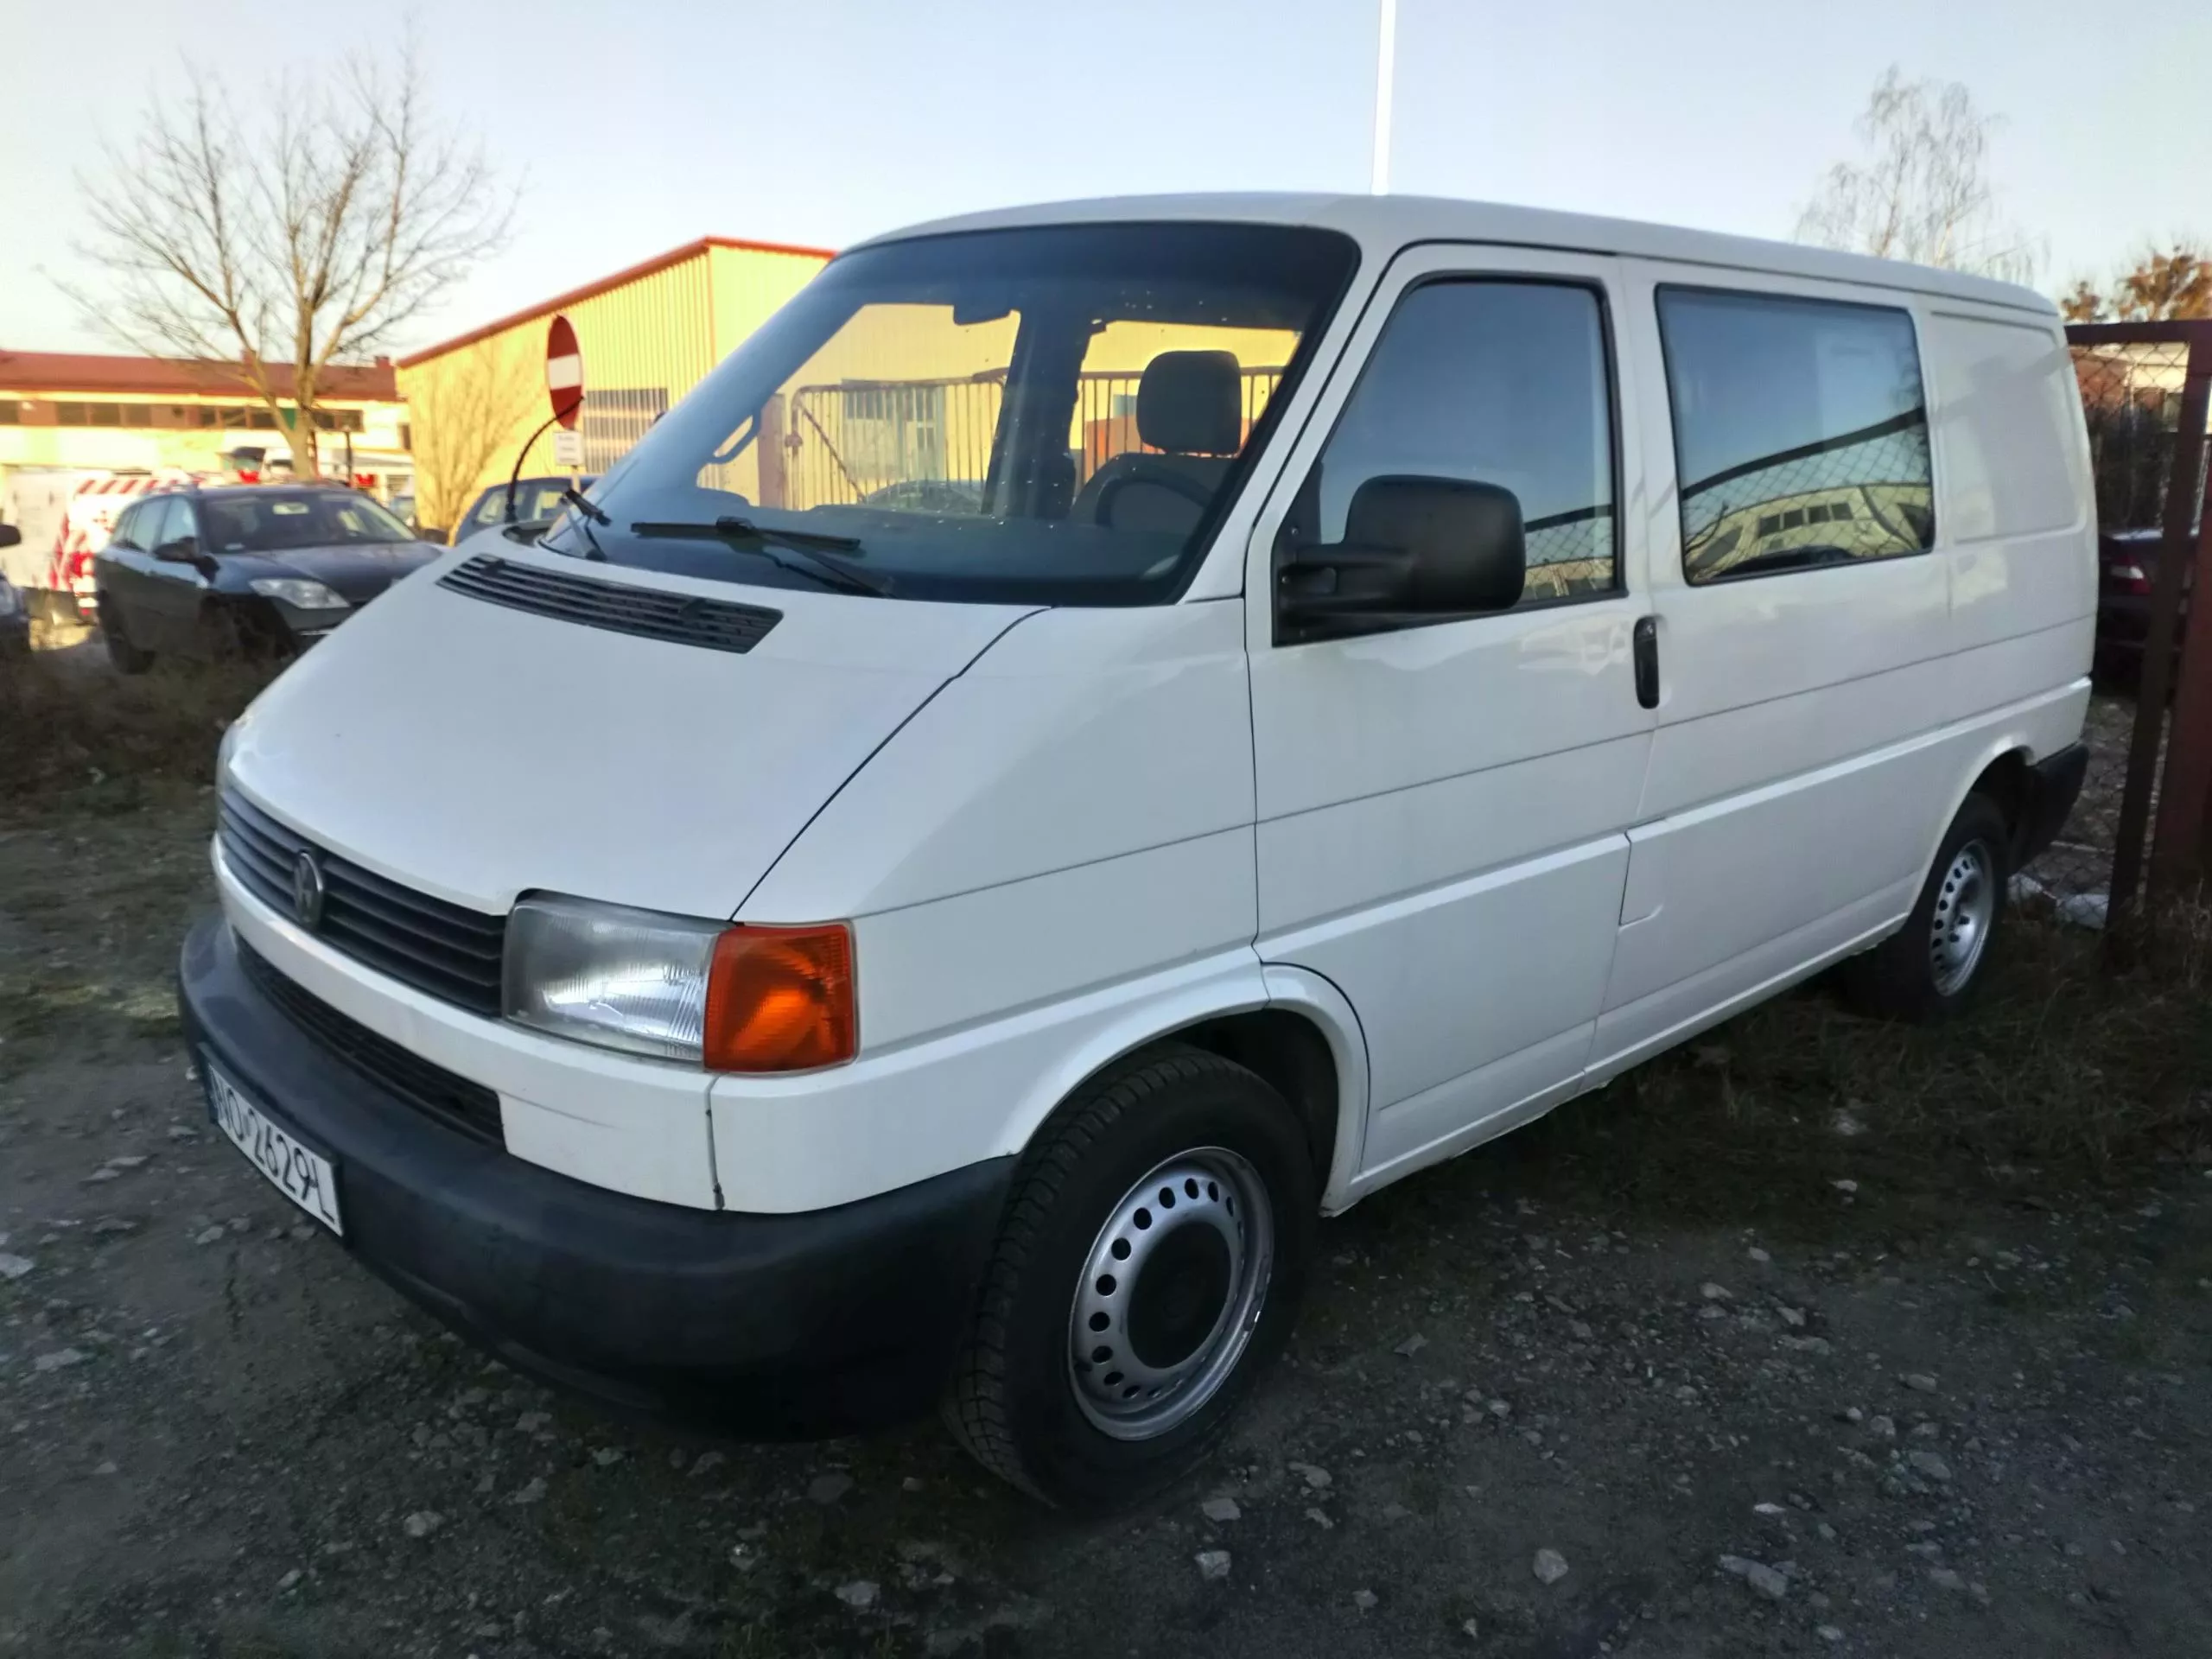

In [3]:
Image(filename='car.jpg',width = 600, height = 300)

## Definicje niezbędnych stałych

In [4]:
TANK_CAPACITY = 80
FUEL_CONSUM = 7.3

# Tyle możemy maksymalnie zjechać z trasy do stacji.
MAX_EXTRA_ROUTE = 50
# Przyjmujemy trasę o długości 5000 km.
END_POINT = 5000 
# Przyjmujemy że na początku trasy w baku mamy 30 litrów paliwa.
FUEL_START = 30

## Sąsiedztwo 
Sąsiedztwo otoczenia zdefiniowaliśmy na dwa sposoby.
W głównej funkcji za pomocą parametru prawdopodobieństwa ustalamy z jakim prawdopodobieństwem
znajdujemy nowe rozwiązanie w danym sąsiedztwie.
- Sąsiedztwo 1: Zmieniamy ilość tankowanego paliwa na stacjach
- Sąsiedztwo 2: Zmieniamy stację 

Oba sąsiedztwa są 'zabezpieczone' tzn. stacja jest osiągalna z warunków problemu a ilości
zatankowanego paliwa wystarczą na dojechanie do kolejnej stacji.

Pierwszy przykład działania algorytmu dla losowo wygenerowanych stacji.

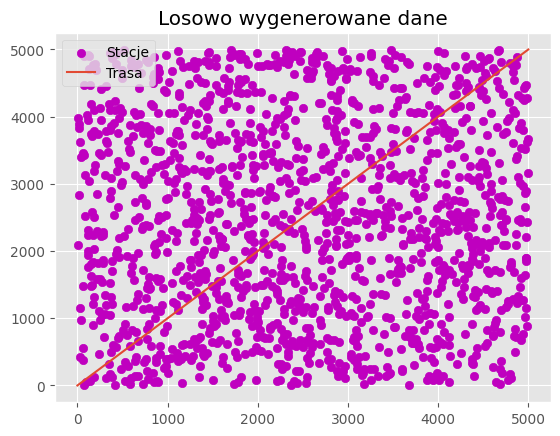

In [5]:
# 1500 losowo wygenerowanych stacji
stations, cords = utils.random_station_generator(1500, 
                            END_POINT,price_range=(3,6))

plot_random_stations(END_POINT, cords)

Wygenerowane powyżej stacje rozpatrujemy w algorytmie.

In [6]:
car = ds.Car(TANK_CAPACITY, FUEL_CONSUM, 0, FUEL_START)
init_s = init_solution(car, END_POINT, MAX_EXTRA_ROUTE, stations)

print("Stacje wybrane podczas inicjalizacji rozwiązania:")
for station in init_s.get_solution():
    print(station)
print("\nKoszt podróży w pierwszym rozwiązaniu:"
      ,round(init_s.solution_value(), 2), "$")

Stacje wybrane podczas inicjalizacji rozwiązania:
(Station: 895 3.68$, 76.19)
(Station: 352 5.67$, 20.46)
(Station: 1091 3.07$, 7.45)
(Station: 1375 4.82$, 65.43)
(Station: 1239 3.41$, 8.08)
(Station: 579 3.14$, 37.26)
(Station: 965 3.85$, 62.03)
(Station: 953 3.6$, 78.37)

Koszt podróży w pierwszym rozwiązaniu: 1634.84 $


Przechodzimy do wywołania głównej funkcji realizującej algorytm.
Nowe argumenty jakie wprowadzamy:
- Parametr T = 2000
- $\alpha$ = 0.95
- Maksymalna ilość iteracji = 10000
- Z prawdopodobieństwem 0.7 przyjmujemy sąsiedztwo (zmiana stacji)

In [7]:
# W zmiennej lst_of_scores przechowujemy historie funkcji celu
best_solution, lst_of_scores, iters,worse = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE
                        ,0.7, 2000, 0.95, 10000)

### Wizualizacja zmian funkcji celu w algorytmie

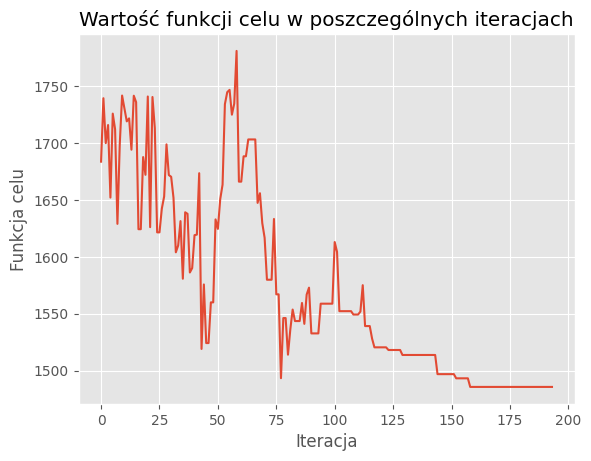

In [8]:
plot_score(lst_of_scores, iters)

## Analiza otrzymanego wyniku

In [9]:
print("\nNajlepsze otrzymane rozwiązanie:"
      ,round(best_solution.solution_value(), 2), "$")
print("Początkowe rozwiązanie:", round(init_s.solution_value(), 2), "$")
print("Liczba wykonanych iteracji:",iters )
print("Liczba zamian na gorsze rozwiązanie:",worse )


Najlepsze otrzymane rozwiązanie: 1485.56 $
Początkowe rozwiązanie: 1634.84 $
Liczba wykonanych iteracji: 194
Liczba zamian na gorsze rozwiązanie: 45


## Czy mogliśmy uzyskać lepsze rozwiązanie? Sprawdźmy otrzymane wyniki w zależności od przyjęcia różnych wartości parametru P


In [10]:
P_values = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
scores = []
for elem in P_values:
    best_solution, lst_of_scores, iters,worse = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE
                        ,elem, 2000, 0.95, 10000)
    scores.append(round(best_solution.solution_value(), 2))

In [11]:
for p,s in zip(P_values, scores):
    print(f'Parametr P: {p:.1f} \nWartość funkcji celu: {s}\n')

Parametr P: 0.0 
Wartość funkcji celu: 1448.45

Parametr P: 0.1 
Wartość funkcji celu: 1473.24

Parametr P: 0.3 
Wartość funkcji celu: 1463.41

Parametr P: 0.5 
Wartość funkcji celu: 1501.29

Parametr P: 0.7 
Wartość funkcji celu: 1430.27

Parametr P: 0.9 
Wartość funkcji celu: 1468.87

Parametr P: 1.0 
Wartość funkcji celu: 1482.11



In [12]:
print(f'Najlepsze rozwiązanie otrzymaliśmy dla parametru P równego {P_values[np.argmin(scores)]}. Nie ma jednak reguły, dla jakiej wartości parametru P otrzymamy zawsze najlepsze rozwiązanie.')

Najlepsze rozwiązanie otrzymaliśmy dla parametru P równego 0.7. Nie ma jednak reguły, dla jakiej wartości parametru P otrzymamy zawsze najlepsze rozwiązanie.


### Jednak nie jest to jedyny parametr, który możemy zmieniać. Zwiększmy teraz parametry T oraz $\alpha$.
- T = 20000
- $\alpha$ = 0.99

In [13]:
best_solution, lst_of_scores, iters,worse = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE
                        ,0.7, 20000, 0.99, 10000)

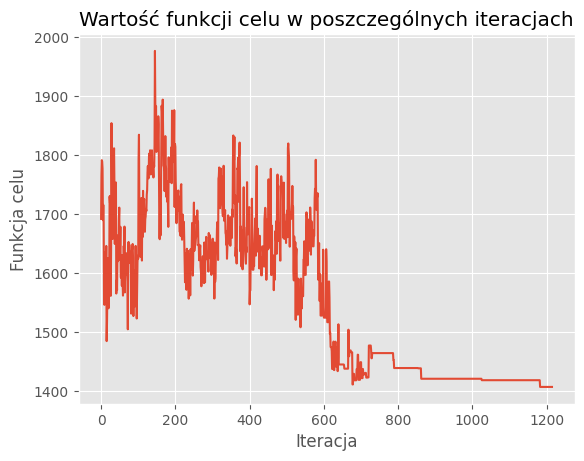

In [14]:
plot_score(lst_of_scores, iters)

In [15]:
print("\nNajlepsze otrzymane rozwiązanie:"
      ,round(best_solution.solution_value(), 2), "$")
print("Początkowe rozwiązanie:", round(init_s.solution_value(), 2), "$")
print("Liczba wykonanych iteracji:",iters )
print("Liczba zamian na gorsze rozwiązanie:",worse )


Najlepsze otrzymane rozwiązanie: 1407.62 $
Początkowe rozwiązanie: 1634.84 $
Liczba wykonanych iteracji: 1215
Liczba zamian na gorsze rozwiązanie: 294


Do czego doprowadziły zmiany? Zwiększyły one ilość wykonanych iteracji w naszym algorytmie oraz poprawiły wartość funkcji celu. Sam wykres wartości funkcji celu w zależności od iteracji wygląda poprawnie. Z początku gdy wartość parametru T jest największa, częściej przyjmujemy gorsze rozwiązanie. Gdy wraz z ilością iteracji wartość T spada, coraz rzadziej akcpetujemy gorsze rozwiązanie a wykres staje się mniej chaotyczny.

### Zbadajmy znów zachowanie algorytmu dla różnych wartości parametru P

In [16]:
P_values = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
scores = []
for elem in P_values:
    best_solution, lst_of_scores, iters,worse = simulated_annealing(
                        new_solution,
                        init_s, stations, END_POINT, MAX_EXTRA_ROUTE
                        ,elem, 20000, 0.99, 10000)
    scores.append(round(best_solution.solution_value(), 2))

In [17]:
for p,s in zip(P_values, scores):
    print(f'Parametr P: {p:.1f} \nWartość funkcji celu: {s}\n')

Parametr P: 0.0 
Wartość funkcji celu: 1436.47

Parametr P: 0.1 
Wartość funkcji celu: 1432.9

Parametr P: 0.3 
Wartość funkcji celu: 1449.74

Parametr P: 0.5 
Wartość funkcji celu: 1409.87

Parametr P: 0.7 
Wartość funkcji celu: 1438.66

Parametr P: 0.9 
Wartość funkcji celu: 1422.22

Parametr P: 1.0 
Wartość funkcji celu: 1420.55



In [18]:
print(f'Najlepsze rozwiązanie otrzymaliśmy dla parametru P równego {P_values[np.argmin(scores)]}. Nie ma jednak reguły, dla jakiej wartości parametru P otrzymamy zawsze najlepsze rozwiązanie.')

Najlepsze rozwiązanie otrzymaliśmy dla parametru P równego 0.5. Nie ma jednak reguły, dla jakiej wartości parametru P otrzymamy zawsze najlepsze rozwiązanie.


Po zwiększeniu parametru T oraz $\alpha$ otrzymaliśmy lepsze wyniki.